# Problems 1 through 5 of [this paper](https://cosmo.nyu.edu/hogg/research/2010/08/17/straightline.pdf)

Written by gregory foote (@gregoryfdel)

In [ ]:
%%capture
!pip install requests tqdm numpy pandas astropy

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.linalg import inv, solve



# Check if using google colab https://stackoverflow.com/questions/53581278/test-if-notebook-is-running-on-google-colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Use LaTeX and HTML for outputting text and tables
from IPython.display import Latex, HTML, display

def latex_print(in_string):
    """
    Outputs a string as if it is LaTeX

    :param string: Input Python String
    :return handle: Output handler for the display object 
    """

    in_string = f"\\textnormal{{{in_string}}}" if IN_COLAB else in_string
    return display(Latex(in_string))

## Problem 1 and 2

In [26]:
with open("hbl2017.csv", "r") as fp:
    line_data = pd.read_csv(fp)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

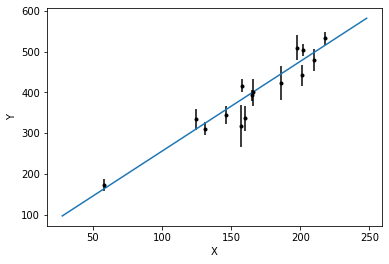

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

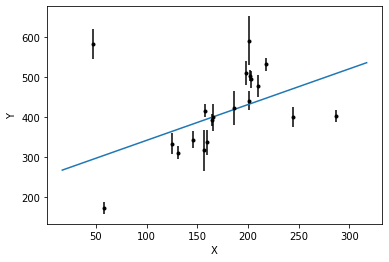

In [68]:
def poly_solve(in_line_data, in_pow, pow_labels):
    in_ys = in_line_data['y'].to_numpy()
    in_xs = in_line_data['x'].to_numpy()
    in_sigma_ys = in_line_data['σy'].to_numpy()

    Y = in_ys    
    A = np.array(list(zip(*(np.power(in_xs, i) for i in range(in_pow + 1)))))
    C = np.diag(in_sigma_ys)
    
    A_reduced = A / np.square(in_sigma_ys)[:, None]
    cov = inv(A.T @ A_reduced)

    f_mat = inv(A.T @ inv(C) @ A) @ (A.T @ inv(C) @ Y)

    fig, ax = plt.subplots()
    ax.errorbar(in_xs, in_ys, yerr=in_sigma_ys, fmt=".k", capsize=0)

    min_plt_x = min(in_xs) - 30
    max_plt_x = max(in_xs) + 30

    plt_xs = np.linspace(min_plt_x, max_plt_x, abs(max_plt_x - min_plt_x))
    plt_ys = sum(np.power(plt_xs, i)*f_mat[i] for i in range(in_pow + 1))

    ax.plot(plt_xs, plt_ys)
    ax.set(xlabel="X", ylabel="Y")

    for i_label, label in enumerate(pow_labels):
        latex_print(f"{label} = {f_mat[i_label]:.4f} \u00B1 {np.sqrt(cov[i_label,i_label]):.4f}")

    plt.show()



poly_solve(line_data[5:], 1, ['b', 'm'])
poly_solve(line_data, 1, ['b', 'm'])

## Problem 3

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

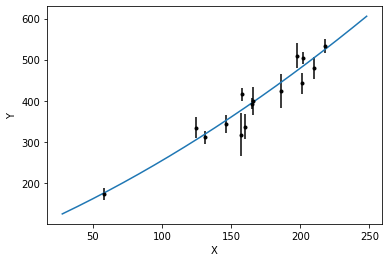

In [69]:
poly_solve(line_data[5:], 2, ["b", "m", "q"])